In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np
import math

In [2]:
#ESERCIZIO 2
cars = pd.read_csv('carsharing.csv', sep = ';', decimal = ',')
cars

,CarIdentifier,TimeFrame,RushHour,PremiumCustomer,Distance,Time
0,102,FRAME D,1,1,3.0,7.9
1,103,FRAME D,1,1,5.3,13.9
2,105,FRAME D,1,-1,0.4,4.1
3,110,FRAME D,1,1,2.8,5.0
4,110,FRAME B,1,-1,2.7,5.6
...,...,...,...,...,...,...
387,996,FRAME C,0,-1,12.5,13.1
388,996,FRAME A,0,1,14.5,17.0
389,996,FRAME C,0,-1,9.8,17.8
390,997,FRAME B,1,-1,1.8,4.0


In [3]:
#2.1 Distance è ordinale, nominale o scalare?
print(cars.Distance)
print('Distance è scalare.')

0       3.0
1       5.3
2       0.4
3       2.8
4       2.7
       ... 
387    12.5
388    14.5
389     9.8
390     1.8
391    18.6
Name: Distance, Length: 392, dtype: float64
Distance è scalare.


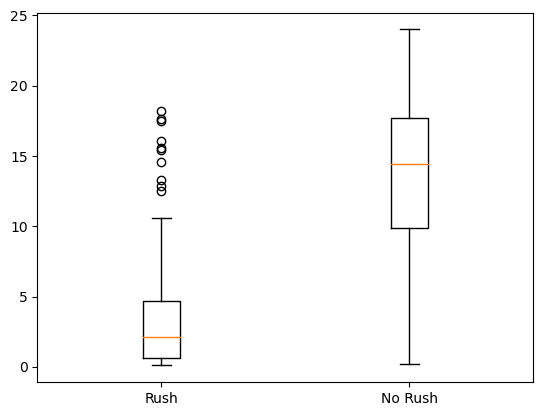

In [6]:
#2.2 Tracciate nella stessa figura il boxplot della distanza in orario di punta e in orario non di punta
plt.boxplot([cars[cars['RushHour'] == 1]['Distance'],cars[cars['RushHour'] == 0]['Distance']], labels=['Rush','No Rush'])
plt.show()

In [7]:
'''
2.3 Dai grafici di prima si può dire che negli orari di punta sono preferiti spostamenti più brevi oppure 
più lunghi rispetto agli orari non di punta? '''
print('Osservando i due box plot, si nota come negli orari di punta sono preferiti spostamenti più brevi rispetto agli orari\nnon di punta, come si può vedere dal 3o quartile di Rush e il 1o quartile di No Rush.')

Osservando i due box plot, si nota come negli orari di punta sono preferiti spostamenti più brevi rispetto agli orari
non di punta, come si può vedere dal 3o quartile di Rush e il 1o quartile di No Rush.


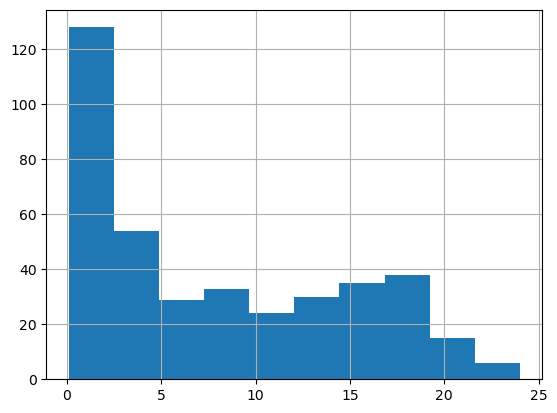

Distanza media Rush: 3.3193548387096796
Distanza media NO Rush: 13.487428571428563
Guardando l istogramma e le due medie calcolate, si nota bene come la media della distanza negli orari di punta sia
più bassa (spostamenti brevi), mentre negli orari non di punta è più alta (spostamenti più lunghi),


In [11]:
#2.4 Dall'istogramma della distanza si possono evidenziare due gruppi ben distinti
cars.Distance.hist()
plt.show()

#Calcolare distanza media dei due gruppi (orario di punta e no) e commentate l'istogramma usando queste due info
print('Distanza media Rush:', cars[cars['RushHour'] == 1]['Distance'].mean())
print('Distanza media NO Rush:', cars[cars['RushHour'] == 0]['Distance'].mean())
print('Guardando l istogramma e le due medie calcolate, si nota bene come la media della distanza negli orari di punta sia\npiù bassa (spostamenti brevi), mentre negli orari non di punta è più alta (spostamenti più lunghi),')

In [12]:
#ESERCIZIO 3

In [13]:
#3.1 Salvate in tragittibrevi tutti i casi in cui la distanza percorsa è stata inferiore a 1.5 km
tragittibrevi = cars[cars['Distance'] < 1.5]
tragittibrevi

,CarIdentifier,TimeFrame,RushHour,PremiumCustomer,Distance,Time
2,105,FRAME D,1,-1,0.4,4.1
10,121,FRAME B,1,1,0.8,4.4
13,127,FRAME B,1,1,0.1,3.6
14,128,FRAME B,1,-1,1.0,4.4
15,133,FRAME D,1,-1,1.2,3.8
...,...,...,...,...,...,...
367,960,FRAME D,1,1,1.3,4.2
371,972,FRAME D,1,1,0.6,4.4
378,983,FRAME D,1,-1,1.2,3.9
381,987,FRAME A,0,1,0.9,2.4


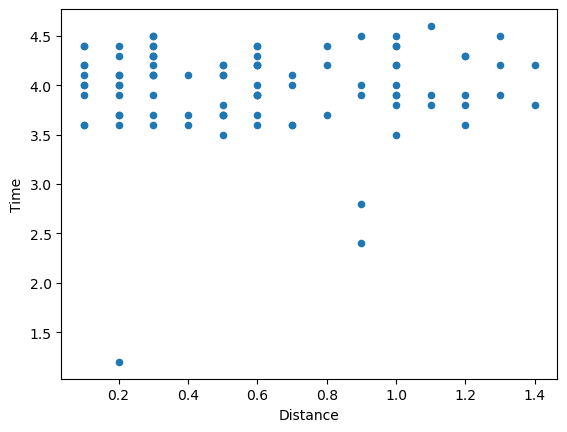

In [14]:
#3.2 Tracciare il grafico di dispersione della distanza e del tempo per i tragitti brevi
tragittibrevi.plot.scatter('Distance', 'Time')
plt.show()

In [16]:
#3.3 Commentate il grafico precedente per concludere se, tra i due attributi, esiste un qualche tipo di relazione
print('Osservando lo scatter plot, si nota come non esiste alcun tipo di relazione tra i due attributi')
print(tragittibrevi['Distance'].corr(tragittibrevi['Time']))
print('L indice di correlazione tendente a 0 conferma tale ipotesi.')

Osservando lo scatter plot, si nota come non esiste alcun tipo di relazione tra i due attributi
0.036911315256573624
L indice di correlazione tendente a 0 conferma tale ipotesi.


In [17]:
#ESERCIZIO 4
#Concentriamoci ora sulla distanza percorsa negli orari non di punta

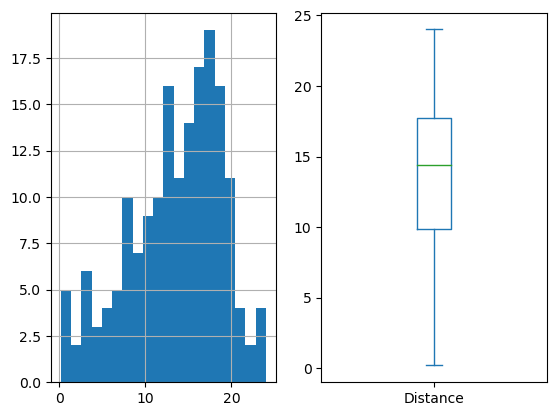

In [20]:
#4.1 Tracciate un grafico opportuno per descivere la distanza negli orari non di punta
plt.subplot(1,2,1)
cars[cars['RushHour'] == 0]['Distance'].hist(bins=20)
plt.subplot(1,2,2)
cars[cars['RushHour'] == 0]['Distance'].plot.box()
plt.show()

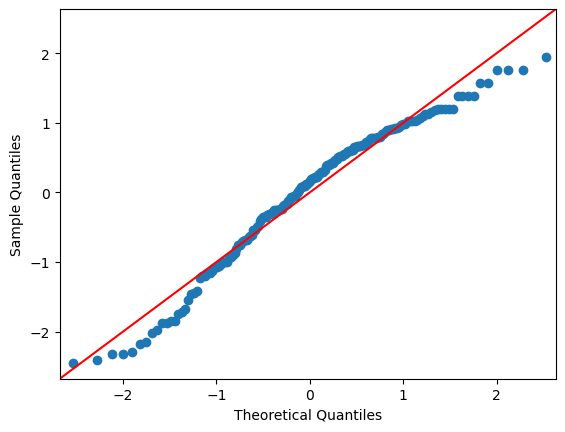

Il QQ-plot evidenzia come i valori della distanza in orari non di punta si distribuisce in modo quasi uniforme sulla
bisettrice, il che suggerisce un modello normale.
13.487428571428563 14.4
Inoltre, i valori molto simili di media e mediana rafforzano ulteriormente questa ipotesi.


In [23]:
#4.2 La distanza negli orari non di punta segue una legge normale? Giustificate
sm.qqplot(cars[cars['RushHour'] == 0]['Distance'], line = '45', fit = True)
plt.show()
print('Il QQ-plot evidenzia come i valori della distanza in orari non di punta si distribuisce in modo quasi uniforme sulla\nbisettrice, il che suggerisce un modello normale.')
print(cars[cars['RushHour'] == 0]['Distance'].mean(), cars[cars['RushHour'] == 0]['Distance'].median())
print('Inoltre, i valori molto simili di media e mediana rafforzano ulteriormente questa ipotesi.')

In [24]:
#ESERCIZIO 5

In [26]:
#5.1 Stima probabilità p che un'auto venga usata in un orario di punta
p = cars.RushHour.mean()
p

0.5535714285714286

In [27]:
#5.2 Che stimatore avete usato prima?
print('La media campionaria')

La media campionaria


In [28]:
#5.3 Qual'è la numerosità del campione a disposizione?
n = len(cars.dropna())
n

392

In [31]:
#5.4 Maggiorazione probabilità che nella stima di p si sia fatto un errore al più uguale a 0.05
Z = st.norm()
2*Z.cdf(0.05*math.sqrt(n)/cars.RushHour.std())-1

0.9532789660906438

In [32]:
#ESERCIZIO 6

In [37]:
'''
Usando altre info non presenti nel dataset, si è stimato che:
    1) P(AutoIncidente) = 0.15
    2) P(Orario di punta incidente) = 0.2
Un'auto oggi non è disponibile perchè ieri ha subito un indicente. Stimare la probabilità che l'incidente sia 
avvenuto in orario di punta
'''
a = 0.15
r = 0.2
n = len(cars[cars['RushHour'] == 1])
(r*(len(cars[cars['RushHour'] == 1])/len(cars)))/a

0.7380952380952381